# Bank of America Stock Data

## 1. Import Libraries and Dependencies

In [6]:
# Import libraries and dependencies
import pandas as pd
from pathlib import Path

## 2. Set File Path for CSV using Pathlib

In [7]:
# Set the file path for the CSV using the Path class from the pathlib library
bac_path = Path('../Resources/BAC.csv')

## 3. Read the CSV into a Pandas DataFrame

In [8]:
# Define a variable "BAC_df" and store the BAC.csv into Pandas DataFrame using the BAC_path
bac_df = pd.read_csv(bac_path)
bac_df.head()

,Date,Open,High,Low,Close,Adj Close,Volume
0,2017-01-03,22.600000,22.680000,22.200001,22.530001,22.006727,99298100
1,2017-01-04,22.719999,22.959999,22.600000,22.950001,22.416971,76875100
2,2017-01-05,22.820000,22.930000,22.350000,22.680000,22.153240,86826400
3,2017-01-06,22.780001,22.850000,22.559999,22.680000,22.153240,66281500
4,2017-01-09,22.510000,22.709999,22.400000,22.549999,22.026258,75744700


## 4. Count Number of Rows in the DataFrame

In [9]:
# Use the `count` function to count the number of non-null rows for each column
bac_df.count()

Date         251
Open         251
High         251
Low          251
Close        251
Adj Close    251
Volume       251
dtype: int64

## 5. Calculate the Min and Max Dates

In [13]:
# Define two variables labeled "earliest_date" and "latest_date"
# Set them equal to the earliest/lastest of Date in bac_df
earliest_date = bac_df['Date'].min()
latest_date = bac_df['Date'].max()

# print the earliest and latest dates
print(earliest_date)
print(latest_date)

2017-01-03
2017-12-29


## 6. Set Date as Index

In [14]:
# Use the `set_index` function to set the `Date` as the index to the DataFrame
bac_df.set_index('Date',inplace=True)

## 7. Filter DataFrame Between 2017-01-03 to 2017-06-03

In [15]:
# After setting the `Date` as the index, loc can be used to specify a range of dates
bac_df.loc['2017-01-03':'2017-06-02']

,Open,High,Low,Close,Adj Close,Volume
Date,,,,,,
2017-01-03,22.600000,22.680000,22.200001,22.530001,22.006727,99298100
2017-01-04,22.719999,22.959999,22.600000,22.950001,22.416971,76875100
2017-01-05,22.820000,22.930000,22.350000,22.680000,22.153240,86826400
2017-01-06,22.780001,22.850000,22.559999,22.680000,22.153240,66281500
2017-01-09,22.510000,22.709999,22.400000,22.549999,22.026258,75744700
...,...,...,...,...,...,...
2017-05-26,23.230000,23.420000,23.170000,23.240000,22.769428,50399500
2017-05-30,23.129999,23.209999,22.879999,22.910000,22.446112,61307900
2017-05-31,22.780001,22.799999,22.090000,22.410000,22.028347,138636300


## 8. Drop Extra Columns

In [26]:
# Drop the extra columns (Close is dropped because there is an Adj Close column)
col_index = list(bac_df.columns)
col_index.remove('Adj Close')
bac_df.drop(col_index,axis='columns',inplace=True)
bac_df.head()

,Adj Close
Date,
2017-01-03,22.006727
2017-01-04,22.416971
2017-01-05,22.153240
2017-01-06,22.153240
2017-01-09,22.026258


## 9. Calculate Daily Returns for Six Months of BAC Closing Prices

In [27]:
# Use the `pct_change` function to calculate the daily returns over the date range of closing BAC prices
six_month_returns = bac_df.loc['2017-01-03':'2017-06-02'].pct_change()
six_month_returns

,Adj Close
Date,
2017-01-03,NaN
2017-01-04,0.018642
2017-01-05,-0.011765
2017-01-06,0.000000
2017-01-09,-0.005732
...,...
2017-05-26,-0.000430
2017-05-30,-0.014200
2017-05-31,-0.018612


## 10. Plot the Daily Returns for 6 Months of BAC Stock

<Axes: xlabel='Date'>

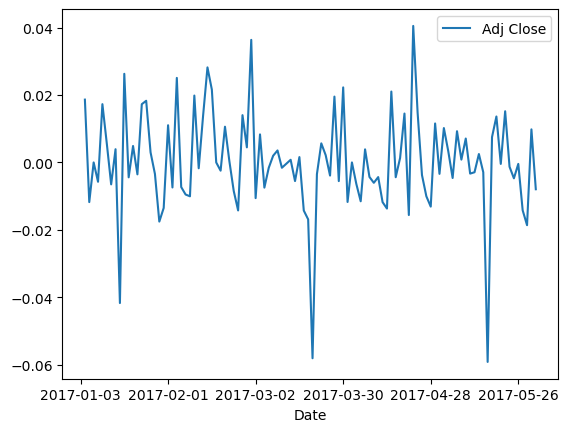

In [28]:
# Use the `plot` function to visualize the daily returns over the 6 month period for BAC
six_month_returns.plot()